In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
ames_train = pd.read_csv('./datasets/train.csv')

In [8]:
# Setting display for ease of viewing. Stack Overflow was consulted for this method.
pd.set_option('display.max_columns',None)

In [9]:
ames_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [10]:
# Full scope of current features and null values
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## Cleaning, Dummies and Numeric Ordinal Ranking of Features

In [11]:
# It was not realized until late in the process 
# that nominal features should be plotted before they are encoded

# Dummify Zoning feature
zone_dummies = pd.get_dummies(ames_train['MS Zoning'],prefix='zoning')
zone_dummies

,zoning_A (agr),zoning_C (all),zoning_FV,zoning_I (all),zoning_RH,zoning_RL,zoning_RM
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
2046,0,0,0,0,0,1,0
2047,0,0,0,0,0,1,0
2048,0,0,0,0,0,1,0
2049,0,0,0,0,0,1,0


In [12]:
# Dummify Street Feature
street_dummies = pd.get_dummies(ames_train['Street'],prefix='street')
# street_dummies

In [13]:
# fill No Alley null value 
ames_train['Alley'].fillna('No Alley',inplace=True)

In [14]:
# Dummify Alley Feature
alley_dummies = pd.get_dummies(ames_train['Alley'],prefix='alley')
# alley_dummies

In [15]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'
# Data Dictionary was used for for choice of mapping ordinal values vs encoding.

ames_train['Lot Shape'] = ames_train['Lot Shape'].map({'Reg':1,'IR1':2,'IR2':3,'IR3':4})
ames_train['Lot Shape']

0       2
1       2
2       1
3       1
4       2
       ..
2046    2
2047    2
2048    1
2049    1
2050    1
Name: Lot Shape, Length: 2051, dtype: int64

In [16]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Utilities'] = ames_train['Utilities'].map({'AllPub':1,'NoSewr':2,'NoSeWa':3,'ELO':4})
ames_train['Utilities']

0       1
1       1
2       1
3       1
4       1
       ..
2046    1
2047    1
2048    1
2049    1
2050    1
Name: Utilities, Length: 2051, dtype: int64

In [17]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Land Slope'] = ames_train['Land Slope'].map({'Gtl':1,'Mod':2,'Sev':3,})
ames_train['Land Slope']

0       1
1       1
2       1
3       1
4       1
       ..
2046    1
2047    1
2048    1
2049    1
2050    1
Name: Land Slope, Length: 2051, dtype: int64

In [18]:
# Dummify Lot Config Feature
lot_config_dummies = pd.get_dummies(ames_train['Lot Config'],prefix='lot_config')
# lot_config_dummies

In [19]:
# Dummify Land Contour Feature
land_contour_dummies = pd.get_dummies(ames_train['Land Contour'],prefix='land_contour')
# land_contour_dummies

In [20]:
# Dummify Neighborhood Feature
neighborhood_dummies = pd.get_dummies(ames_train['Neighborhood'],prefix='neighborhood')
# neighborhood_dummies

In [21]:
# Dummify Condition 1 Feature
condition1_dummies = pd.get_dummies(ames_train['Condition 1'],prefix='condition1')
# condition1_dummies

In [22]:
# Dummify Condition 2 Feature
condition2_dummies = pd.get_dummies(ames_train['Condition 2'],prefix='condition2')
# condition2_dummies

In [23]:
# Dummify Building Type Feature
buildtype_dummies = pd.get_dummies(ames_train['Bldg Type'],prefix='bldg_type')
# buildtype_dummies

In [24]:
# Dummify House Style Feature
house_style_dummies = pd.get_dummies(ames_train['House Style'],prefix='house_style')
# house_style_dummies

In [25]:
# Dummify Roof Style Feature
roof_style_dummies = pd.get_dummies(ames_train['Roof Style'],prefix='roof_style')
# roof_style_dummies

In [26]:
# Dummify Roof Material Feature
roof_material_dummies = pd.get_dummies(ames_train['Roof Matl'],prefix='roof_mat')
# roof_material_dummies

In [27]:
# Dummify Exterior 1 Feature
exterior1_dummies = pd.get_dummies(ames_train['Exterior 1st'],prefix='exterior1')
# exterior1_dummies

In [28]:
# Dummify Exterior 2 Feature
exterior2_dummies = pd.get_dummies(ames_train['Exterior 2nd'],prefix='exterior2')
# exterior2_dummies

In [29]:
ames_train['Mas Vnr Type'].fillna('None',inplace=True)

In [30]:
# Dummify Veneer Type Feature
veneer_dummies = pd.get_dummies(ames_train['Mas Vnr Type'],prefix='veneer')
# veneer_dummies

In [31]:
# Fill NAs with 0 for no veneer area.  This should be investigated if it will interfers with the model.
ames_train['Mas Vnr Area'].fillna(0,inplace=True)

In [32]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Exter Qual'] = ames_train['Exter Qual'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
ames_train['Exter Qual']

0       2
1       2
2       3
3       3
4       3
       ..
2046    2
2047    3
2048    3
2049    3
2050    3
Name: Exter Qual, Length: 2051, dtype: int64

In [33]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Exter Cond'] = ames_train['Exter Cond'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
ames_train['Exter Cond']

0       3
1       3
2       2
3       3
4       3
       ..
2046    3
2047    3
2048    3
2049    3
2050    3
Name: Exter Cond, Length: 2051, dtype: int64

In [34]:
# Dummify Foundation Feature
foundation_dummies = pd.get_dummies(ames_train['Foundation'],prefix='foundation')
# foundation_dummies

In [35]:
# No basement to have 0 rank
ames_train['Bsmt Qual'].fillna('no basement',inplace=True)

In [36]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Bsmt Qual'] = ames_train['Bsmt Qual'].map({'Ex':1,'Gd':2,'TA':3,
                                                       'Fa':4,'Po':5,'no basement':6})
ames_train['Bsmt Qual']

0       3
1       2
2       3
3       2
4       4
       ..
2046    2
2047    3
2048    3
2049    3
2050    3
Name: Bsmt Qual, Length: 2051, dtype: int64

In [37]:
# No basement to have 0 rank for Condition
ames_train['Bsmt Cond'].fillna('no basement',inplace=True)

# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Bsmt Cond'] = ames_train['Bsmt Cond'].map({'Ex':1,'Gd':2,'TA':3,
                                                       'Fa':4,'Po':5,'no basement':6})
ames_train['Bsmt Cond']

0       3
1       3
2       3
3       3
4       2
       ..
2046    3
2047    3
2048    3
2049    3
2050    3
Name: Bsmt Cond, Length: 2051, dtype: int64

In [38]:
# No basement to have 0 rank for Exposure
ames_train['Bsmt Exposure'].fillna('no basement',inplace=True)

# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Bsmt Exposure'] = ames_train['Bsmt Exposure'].map({'Gd':1,'Av':2,'Mn':3,
                                                               'No':4,'no basement':5})
ames_train['Bsmt Exposure']

0       4
1       4
2       4
3       4
4       4
       ..
2046    2
2047    4
2048    4
2049    4
2050    4
Name: Bsmt Exposure, Length: 2051, dtype: int64

In [39]:
# No basement to have 0 rank for Finished
ames_train['BsmtFin Type 1'].fillna('no basement',inplace=True)

# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['BsmtFin Type 1'] = ames_train['BsmtFin Type 1'].map({'GLQ':1,'ALQ':2,
                                                                 'BLQ':3,'Rec':4,'LwQ':5,
                                                                 'Unf':6,'no basement':7})
ames_train['BsmtFin Type 1']

0       1
1       1
2       1
3       6
4       6
       ..
2046    1
2047    3
2048    6
2049    4
2050    6
Name: BsmtFin Type 1, Length: 2051, dtype: int64

In [40]:
ames_train['BsmtFin SF 1'].fillna(0,inplace=True)

In [41]:
# No basement to have 0 rank for Finished
ames_train['BsmtFin Type 2'].fillna('no basement',inplace=True)

# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['BsmtFin Type 2'] = ames_train['BsmtFin Type 2'].map({'GLQ':1,'ALQ':2,
                                                                 'BLQ':3,'Rec':4,'LwQ':5,
                                                                 'Unf':6,'no basement':7})
ames_train['BsmtFin Type 2']

0       6
1       6
2       6
3       6
4       6
       ..
2046    6
2047    6
2048    6
2049    5
2050    6
Name: BsmtFin Type 2, Length: 2051, dtype: int64

In [42]:
ames_train['BsmtFin SF 2'].fillna(0,inplace=True)

In [43]:
ames_train['Bsmt Unf SF'].fillna(0,inplace=True)
ames_train['Total Bsmt SF'].fillna(0,inplace=True)

In [44]:
# Dummify Heating Feature
heating_dummies = pd.get_dummies(ames_train['Heating'],prefix='heating')
heating_dummies

,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2046,1,0,0,0,0
2047,1,0,0,0,0
2048,1,0,0,0,0
2049,1,0,0,0,0


In [45]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Heating QC'] = ames_train['Heating QC'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
ames_train['Heating QC']

0       1
1       1
2       3
3       2
4       3
       ..
2046    1
2047    1
2048    2
2049    3
2050    2
Name: Heating QC, Length: 2051, dtype: int64

In [46]:
# Dummify Central Air Feature
central_air_dummies = pd.get_dummies(ames_train['Central Air'],prefix='central_air')
# central_air_dummies

In [47]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Electrical'] = ames_train['Electrical'].map({'SBrkr':1,'FuseA':2,'FuseF':3,'FuseP':4,'Mix':5})
ames_train['Electrical']

0       1
1       1
2       1
3       1
4       1
       ..
2046    1
2047    1
2048    1
2049    1
2050    1
Name: Electrical, Length: 2051, dtype: int64

In [48]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Kitchen Qual'] = ames_train['Kitchen Qual'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
ames_train['Kitchen Qual']

0       2
1       2
2       2
3       3
4       3
       ..
2046    2
2047    3
2048    3
2049    3
2050    2
Name: Kitchen Qual, Length: 2051, dtype: int64

In [49]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Functional'] = ames_train['Functional'].map({'Typ':1,'Min1':2,'Min2':3,
                                                             'Mod':4,'Maj1':5,'Maj2':6,
                                                        'Sev':7,'Sal':8})
ames_train['Functional']

0       1
1       1
2       1
3       1
4       1
       ..
2046    1
2047    1
2048    1
2049    1
2050    1
Name: Functional, Length: 2051, dtype: int64

In [50]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Fireplace Qu'].fillna('no fireplace',inplace=True)

ames_train['Fireplace Qu'] = ames_train['Fireplace Qu'].map({'Ex':1,'Gd':2,'TA':3,
                                                             'Fa':4,'Po':5,'no fireplace':6})
ames_train['Fireplace Qu']

0       6
1       3
2       6
3       6
4       6
       ..
2046    2
2047    6
2048    3
2049    2
2050    3
Name: Fireplace Qu, Length: 2051, dtype: int64

In [51]:
ames_train['Garage Type'].fillna('no garage',inplace=True)

In [52]:
#Dummify garage type feature
garage_dummies = pd.get_dummies(ames_train['Garage Type'],prefix='garage_type')
# garage_dummies

In [53]:
ames_train['Garage Finish'].fillna('no garage',inplace=True)

In [54]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Garage Finish'] = ames_train['Garage Finish'].map({'Fin':1,'RFn':2,'Unf':3,
                                                             'no garage':4})
ames_train['Garage Finish']

0       2
1       2
2       3
3       1
4       3
       ..
2046    1
2047    3
2048    3
2049    3
2050    1
Name: Garage Finish, Length: 2051, dtype: int64

In [55]:
ames_train['Garage Cars'].fillna(0,inplace=True)
ames_train['Garage Area'].fillna(0,inplace=True)

In [56]:
ames_train['Garage Qual'].fillna('no garage',inplace=True)
ames_train['Garage Cond'].fillna('no garage',inplace=True)

In [57]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Garage Qual'] = ames_train['Garage Qual'].map({'Ex':1,'Gd':2,'TA':3,
                                                             'Fa':4,'Po':5,'no garage':6})
ames_train['Garage Qual']

0       3
1       3
2       3
3       3
4       3
       ..
2046    3
2047    3
2048    4
2049    3
2050    3
Name: Garage Qual, Length: 2051, dtype: int64

In [58]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Garage Cond'] = ames_train['Garage Cond'].map({'Ex':1,'Gd':2,'TA':3,
                                                             'Fa':4,'Po':5,'no garage':6})
ames_train['Garage Cond']

0       3
1       3
2       3
3       3
4       3
       ..
2046    3
2047    3
2048    4
2049    3
2050    3
Name: Garage Cond, Length: 2051, dtype: int64

In [59]:
ames_train['Paved Drive'].fillna('no drive',inplace=True)

In [60]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Paved Drive'] = ames_train['Paved Drive'].map({'Y':1,'P':2,'N':3,
                                                             'no drive':4})
ames_train['Paved Drive']

0       1
1       1
2       1
3       1
4       3
       ..
2046    1
2047    1
2048    1
2049    1
2050    1
Name: Paved Drive, Length: 2051, dtype: int64

In [61]:
# Dropping Pool QC column as it is overwhelmingly null
ames_train.drop(columns='Pool QC',inplace=True)

In [62]:
ames_train['Fence'].fillna('no fence',inplace=True)

In [63]:
ames_train["Fence"].value_counts()

no fence    1651
MnPrv        227
GdPrv         83
GdWo          80
MnWw          10
Name: Fence, dtype: int64

In [64]:
# Dictionary method for ordinal numeric ranking in feature column: 1 = 'best'

ames_train['Fence'] = ames_train['Fence'].map({'GdPrv':1,'MnPrv':2,'GdWo':3,
                                                             'MnWw':4,'no fence':5})
ames_train['Fence']

0       5
1       5
2       5
3       5
4       5
       ..
2046    5
2047    5
2048    5
2049    5
2050    5
Name: Fence, Length: 2051, dtype: int64

In [65]:
# Dropping Misc Feature column as it is overwhelmingly null
ames_train.drop(columns='Misc Feature',inplace=True)

In [66]:
#Dummify sale type feature
sale_type_dummies = pd.get_dummies(ames_train['Sale Type'],prefix='sale_type')
# sale_type_dummies

In [67]:
# The source Data Dictionary says there is a feature named 'Sale Condition' 
# that does not appear to be in the dataset

In [68]:
ames_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,No Alley,2,Lvl,1,CulDSac,1,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,2,3,CBlock,3,3,4,1,533.0,6,0.0,192.0,725.0,GasA,1,Y,1,725,754,0,1479,0.0,0.0,2,1,3,1,2,6,1,0,6,Attchd,1976.0,2,2.0,475.0,3,3,1,0,44,0,0,0,0,5,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,No Alley,2,Lvl,1,CulDSac,1,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,2,3,PConc,2,3,4,1,637.0,6,0.0,276.0,913.0,GasA,1,Y,1,913,1209,0,2122,1.0,0.0,2,1,4,1,2,8,1,1,3,Attchd,1997.0,2,2.0,559.0,3,3,1,0,74,0,0,0,0,5,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,No Alley,1,Lvl,1,Inside,1,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,CBlock,3,3,4,1,731.0,6,0.0,326.0,1057.0,GasA,3,Y,1,1057,0,0,1057,1.0,0.0,1,0,3,1,2,5,1,0,6,Detchd,1953.0,3,1.0,246.0,3,3,1,0,52,0,0,0,0,5,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,No Alley,1,Lvl,1,Inside,1,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,2,3,4,6,0.0,6,0.0,384.0,384.0,GasA,2,Y,1,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,1,0,6,BuiltIn,2007.0,1,2.0,400.0,3,3,1,100,0,0,0,0,0,5,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,No Alley,2,Lvl,1,Inside,1,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,4,2,4,6,0.0,6,0.0,676.0,676.0,GasA,3,Y,1,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,1,0,6,Detchd,1957.0,3,2.0,484.0,3,3,3,0,59,0,0,0,0,5,0,3,2010,WD,138500


In [69]:
ames_train['Lot Frontage'].fillna(0,inplace=True)

In [70]:
# Removing Nans from numeric columns
ames_train['Bsmt Full Bath'].fillna(0,inplace=True)
ames_train['Bsmt Half Bath'].fillna(0,inplace=True)
# 0 used for no garage designation
ames_train['Garage Yr Blt'].fillna(0,inplace=True)

In [71]:
# Reversing ordinal ranks so that 1 = 'best'

ames_train['Overall Qual'] = ames_train['Overall Qual'].map({10:1,9:2,8:3,
                                                             7:4,6:5,5:6,4:7,3:8,2:9,1:10})
ames_train['Overall Qual']

0       5
1       4
2       6
3       6
4       5
       ..
2046    3
2047    7
2048    5
2049    7
2050    4
Name: Overall Qual, Length: 2051, dtype: int64

In [72]:
# Reversing ordinal ranks so that 1 = 'best'

ames_train['Overall Cond'] = ames_train['Overall Cond'].map({10:1,9:2,8:3,
                                                             7:4,6:5,5:6,4:7,3:8,2:9,1:10})
ames_train['Overall Cond']

0       3
1       6
2       4
3       6
4       3
       ..
2046    6
2047    6
2048    5
2049    6
2050    6
Name: Overall Cond, Length: 2051, dtype: int64

In [73]:
# The remaining object features have all been one hot encoded separately at this point.
# All null values have been filled and managed
# Null values for ordinal features have been assigned the highest integer as the "worst quality"
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   int64  
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   int64  
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   int64  
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [74]:
# filtering out original object datatypes to combine later with hot encoded DataFrames
ames_train.select_dtypes(exclude=['object']).head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,0.0,13517,2,1,1,5,3,1976,2005,289.0,2,3,3,3,4,1,533.0,6,0.0,192.0,725.0,1,1,725,754,0,1479,0.0,0.0,2,1,3,1,2,6,1,0,6,1976.0,2,2.0,475.0,3,3,1,0,44,0,0,0,0,5,0,3,2010,130500
1,544,531379050,60,43.0,11492,2,1,1,4,6,1996,1997,132.0,2,3,2,3,4,1,637.0,6,0.0,276.0,913.0,1,1,913,1209,0,2122,1.0,0.0,2,1,4,1,2,8,1,1,3,1997.0,2,2.0,559.0,3,3,1,0,74,0,0,0,0,5,0,4,2009,220000
2,153,535304180,20,68.0,7922,1,1,1,6,4,1953,2007,0.0,3,2,3,3,4,1,731.0,6,0.0,326.0,1057.0,3,1,1057,0,0,1057,1.0,0.0,1,0,3,1,2,5,1,0,6,1953.0,3,1.0,246.0,3,3,1,0,52,0,0,0,0,5,0,1,2010,109000
3,318,916386060,60,73.0,9802,1,1,1,6,6,2006,2007,0.0,3,3,2,3,4,6,0.0,6,0.0,384.0,384.0,2,1,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,1,0,6,2007.0,1,2.0,400.0,3,3,1,100,0,0,0,0,0,5,0,4,2010,174000
4,255,906425045,50,82.0,14235,2,1,1,5,3,1900,1993,0.0,3,3,4,2,4,6,0.0,6,0.0,676.0,676.0,3,1,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,1,0,6,1957.0,3,2.0,484.0,3,3,3,0,59,0,0,0,0,5,0,3,2010,138500


In [75]:
# Filter test
ames_train._get_numeric_data()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,0.0,13517,2,1,1,5,3,1976,2005,289.0,2,3,3,3,4,1,533.0,6,0.0,192.0,725.0,1,1,725,754,0,1479,0.0,0.0,2,1,3,1,2,6,1,0,6,1976.0,2,2.0,475.0,3,3,1,0,44,0,0,0,0,5,0,3,2010,130500
1,544,531379050,60,43.0,11492,2,1,1,4,6,1996,1997,132.0,2,3,2,3,4,1,637.0,6,0.0,276.0,913.0,1,1,913,1209,0,2122,1.0,0.0,2,1,4,1,2,8,1,1,3,1997.0,2,2.0,559.0,3,3,1,0,74,0,0,0,0,5,0,4,2009,220000
2,153,535304180,20,68.0,7922,1,1,1,6,4,1953,2007,0.0,3,2,3,3,4,1,731.0,6,0.0,326.0,1057.0,3,1,1057,0,0,1057,1.0,0.0,1,0,3,1,2,5,1,0,6,1953.0,3,1.0,246.0,3,3,1,0,52,0,0,0,0,5,0,1,2010,109000
3,318,916386060,60,73.0,9802,1,1,1,6,6,2006,2007,0.0,3,3,2,3,4,6,0.0,6,0.0,384.0,384.0,2,1,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,1,0,6,2007.0,1,2.0,400.0,3,3,1,100,0,0,0,0,0,5,0,4,2010,174000
4,255,906425045,50,82.0,14235,2,1,1,5,3,1900,1993,0.0,3,3,4,2,4,6,0.0,6,0.0,676.0,676.0,3,1,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,1,0,6,1957.0,3,2.0,484.0,3,3,3,0,59,0,0,0,0,5,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,79.0,11449,2,1,1,3,6,2007,2007,0.0,2,3,2,3,2,1,1011.0,6,0.0,873.0,1884.0,1,1,1728,0,0,1728,1.0,0.0,2,0,3,1,2,7,1,1,2,2007.0,1,2.0,520.0,3,3,1,0,276,0,0,0,0,5,0,1,2008,298751
2047,785,905377130,30,0.0,12342,2,1,1,7,6,1940,1950,0.0,3,3,3,3,4,3,262.0,6,0.0,599.0,861.0,1,1,861,0,0,861,0.0,0.0,1,0,1,1,3,4,1,0,6,1961.0,3,2.0,539.0,3,3,1,158,0,0,0,0,0,5,0,3,2009,82500
2048,916,909253010,50,57.0,7558,1,1,1,5,5,1928,1950,0.0,3,3,3,3,4,6,0.0,6,0.0,896.0,896.0,2,1,1172,741,0,1913,0.0,0.0,1,1,3,1,3,9,1,1,3,1929.0,3,2.0,342.0,4,4,1,0,0,0,0,0,0,5,0,3,2009,177000
2049,639,535179160,20,80.0,10400,1,1,1,7,6,1956,1956,0.0,3,3,3,3,4,4,155.0,5,750.0,295.0,1200.0,3,1,1200,0,0,1200,1.0,0.0,1,0,3,1,3,6,1,2,2,1956.0,3,1.0,294.0,3,3,1,0,189,140,0,0,0,5,0,11,2009,144000


## EDA:

In [76]:
ames_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,No Alley,2,Lvl,1,CulDSac,1,Sawyer,RRAe,Norm,1Fam,2Story,5,3,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,2,3,CBlock,3,3,4,1,533.0,6,0.0,192.0,725.0,GasA,1,Y,1,725,754,0,1479,0.0,0.0,2,1,3,1,2,6,1,0,6,Attchd,1976.0,2,2.0,475.0,3,3,1,0,44,0,0,0,0,5,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,No Alley,2,Lvl,1,CulDSac,1,SawyerW,Norm,Norm,1Fam,2Story,4,6,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,2,3,PConc,2,3,4,1,637.0,6,0.0,276.0,913.0,GasA,1,Y,1,913,1209,0,2122,1.0,0.0,2,1,4,1,2,8,1,1,3,Attchd,1997.0,2,2.0,559.0,3,3,1,0,74,0,0,0,0,5,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,No Alley,1,Lvl,1,Inside,1,NAmes,Norm,Norm,1Fam,1Story,6,4,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,CBlock,3,3,4,1,731.0,6,0.0,326.0,1057.0,GasA,3,Y,1,1057,0,0,1057,1.0,0.0,1,0,3,1,2,5,1,0,6,Detchd,1953.0,3,1.0,246.0,3,3,1,0,52,0,0,0,0,5,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,No Alley,1,Lvl,1,Inside,1,Timber,Norm,Norm,1Fam,2Story,6,6,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,2,3,4,6,0.0,6,0.0,384.0,384.0,GasA,2,Y,1,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,1,0,6,BuiltIn,2007.0,1,2.0,400.0,3,3,1,100,0,0,0,0,0,5,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,No Alley,2,Lvl,1,Inside,1,SawyerW,Norm,Norm,1Fam,1.5Fin,5,3,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,4,2,4,6,0.0,6,0.0,676.0,676.0,GasA,3,Y,1,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,1,0,6,Detchd,1957.0,3,2.0,484.0,3,3,3,0,59,0,0,0,0,5,0,3,2010,WD,138500


In [77]:
# EDA from this DataFrame is with features that are discrete, continuous or ordinal
# Nominal DataFrames are segmented in separate one hot encoded variables
train_numerics = ames_train._get_numeric_data()
train_numerics.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,0.0,13517,2,1,1,5,3,1976,2005,289.0,2,3,3,3,4,1,533.0,6,0.0,192.0,725.0,1,1,725,754,0,1479,0.0,0.0,2,1,3,1,2,6,1,0,6,1976.0,2,2.0,475.0,3,3,1,0,44,0,0,0,0,5,0,3,2010,130500
1,544,531379050,60,43.0,11492,2,1,1,4,6,1996,1997,132.0,2,3,2,3,4,1,637.0,6,0.0,276.0,913.0,1,1,913,1209,0,2122,1.0,0.0,2,1,4,1,2,8,1,1,3,1997.0,2,2.0,559.0,3,3,1,0,74,0,0,0,0,5,0,4,2009,220000
2,153,535304180,20,68.0,7922,1,1,1,6,4,1953,2007,0.0,3,2,3,3,4,1,731.0,6,0.0,326.0,1057.0,3,1,1057,0,0,1057,1.0,0.0,1,0,3,1,2,5,1,0,6,1953.0,3,1.0,246.0,3,3,1,0,52,0,0,0,0,5,0,1,2010,109000
3,318,916386060,60,73.0,9802,1,1,1,6,6,2006,2007,0.0,3,3,2,3,4,6,0.0,6,0.0,384.0,384.0,2,1,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,1,0,6,2007.0,1,2.0,400.0,3,3,1,100,0,0,0,0,0,5,0,4,2010,174000
4,255,906425045,50,82.0,14235,2,1,1,5,3,1900,1993,0.0,3,3,4,2,4,6,0.0,6,0.0,676.0,676.0,3,1,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,1,0,6,1957.0,3,2.0,484.0,3,3,3,0,59,0,0,0,0,5,0,3,2010,138500


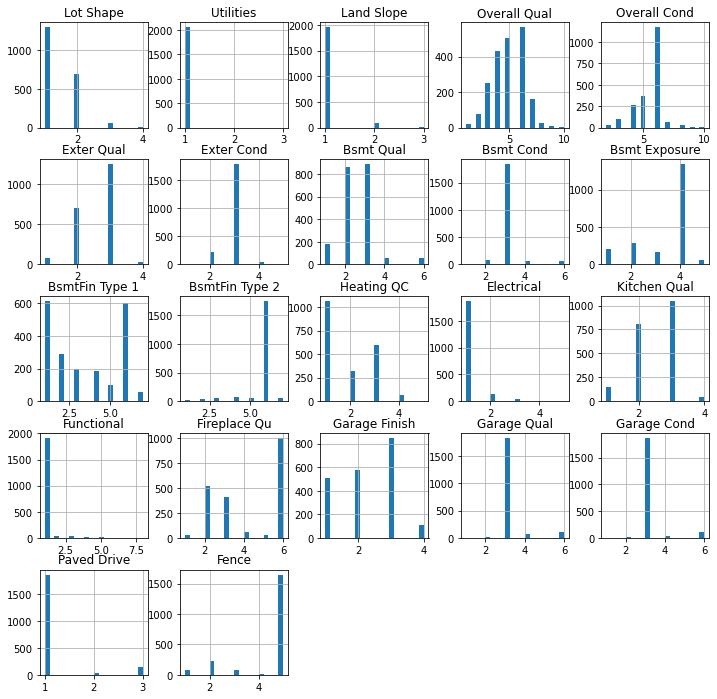

In [78]:
# Histograms for Ordinal Features: 1 = 'best' and higher integers are of lesser quality.

train_numerics.hist(column=['Lot Shape','Utilities',
                            'Land Slope','Overall Qual','Overall Cond',
                           'Exter Qual','Exter Cond','Bsmt Qual',
                           'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1',
                           'BsmtFin Type 2','Heating QC','Electrical',
                           'Kitchen Qual','Functional','Fireplace Qu',
                           'Garage Finish','Garage Qual','Garage Cond',
                           'Paved Drive','Fence'],bins=20,figsize=(12,12));

#### Scatterplots for continuous and discrete features

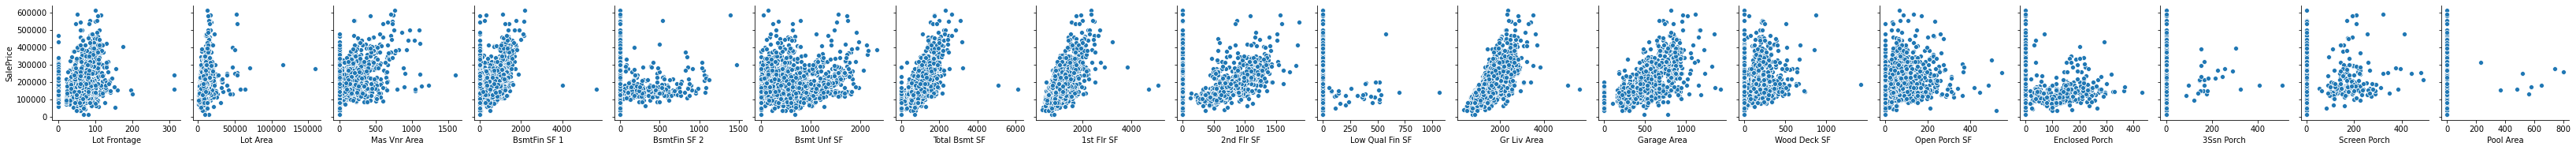

In [79]:
# Continuous Features. Ignoring Misc Val

# plt.figure(figsize=(10,10))

sns.pairplot(train_numerics,y_vars='SalePrice',x_vars=['Lot Frontage',
                                                      'Lot Area',
                                                      'Mas Vnr Area',
                                                       'BsmtFin SF 1',
                                                      'BsmtFin SF 2',
                                                      'Bsmt Unf SF',
                                                      'Total Bsmt SF',
                                                      '1st Flr SF',
                                                      '2nd Flr SF',
                                                       'Low Qual Fin SF',
                                                      'Gr Liv Area',
                                                      'Garage Area',
                                                      'Wood Deck SF',
                                                      'Open Porch SF',
                                                      'Enclosed Porch',
                                                      '3Ssn Porch',
                                                      'Screen Porch',
                                                      'Pool Area']);

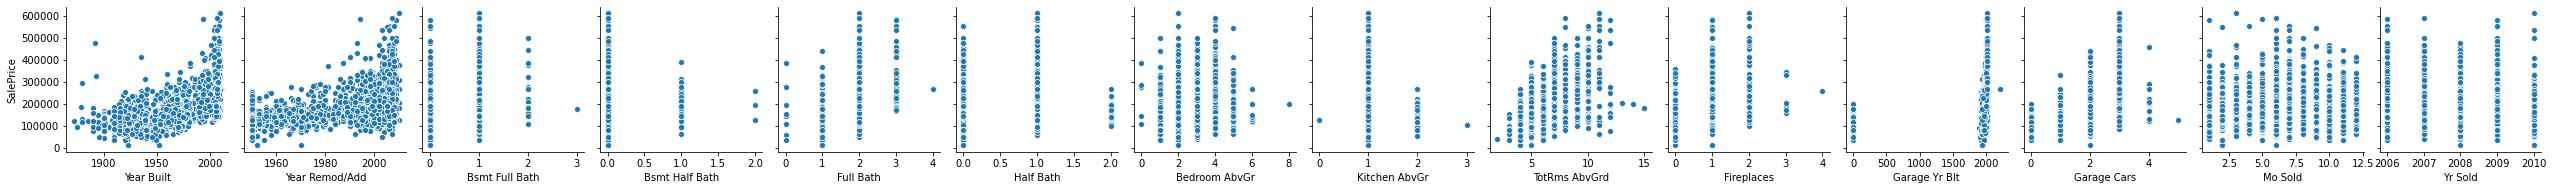

In [80]:
# Discrete Features

sns.pairplot(train_numerics,y_vars='SalePrice',x_vars=['Year Built',
                                                      'Year Remod/Add',
                                                      'Bsmt Full Bath',
                                                       'Bsmt Half Bath',
                                                      'Full Bath',
                                                      'Half Bath',
                                                      'Bedroom AbvGr',
                                                      'Kitchen AbvGr',
                                                      'TotRms AbvGrd',
                                                       'Fireplaces',
                                                      'Garage Yr Blt',
                                                      'Garage Cars',
                                                      'Mo Sold',
                                                      'Yr Sold'])

(array([  7.,  12.,  56., 162., 121., 183., 370., 288., 198., 654.]),
 array([1872. , 1885.8, 1899.6, 1913.4, 1927.2, 1941. , 1954.8, 1968.6,
        1982.4, 1996.2, 2010. ]),
 <BarContainer object of 10 artists>)

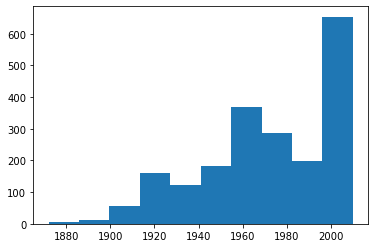

In [81]:
plt.hist(ames_train['Year Built'])

In [82]:
# Concatenate all one hot encoded DataFrames

dummies_frames = pd.concat([zone_dummies,alley_dummies,street_dummies,
                            land_contour_dummies,lot_config_dummies,
                            neighborhood_dummies,condition1_dummies,
                           condition2_dummies,buildtype_dummies,
                           house_style_dummies,roof_style_dummies,
                           roof_material_dummies,exterior1_dummies,
                           exterior2_dummies,veneer_dummies,foundation_dummies,
                           heating_dummies,central_air_dummies,
                            garage_dummies,sale_type_dummies],axis=1)
                


In [83]:
# Combine one hot encoded Dataframes with all other numeric DataFrames

all_numerics = pd.concat([train_numerics,dummies_frames],axis=1)
all_numerics.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice,zoning_A (agr),zoning_C (all),zoning_FV,zoning_I (all),zoning_RH,zoning_RL,zoning_RM,alley_Grvl,alley_No Alley,alley_Pave,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Artery,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_mat_ClyTile,roof_mat_CompShg,roof_mat_Membran,roof_mat_Tar&Grv,roof_mat_WdShake,roof_mat_WdShngl,exterior1_AsbShng,exterior1_AsphShn,exterior1_BrkComm,exterior1_BrkFace,exterior1_CBlock,exterior1_CemntBd,exterior1_HdBoard,exterior1_ImStucc,exterior1_MetalSd,exterior1_Plywood,exterior1_Stone,exterior1_Stucco,exterior1_VinylSd,exterior1_Wd Sdng,exterior1_WdShing,exterior2_AsbShng,exterior2_AsphShn,exterior2_Brk Cmn,exterior2_BrkFace,exterior2_CBlock,exterior2_CmentBd,exterior2_HdBoard,exterior2_ImStucc,exterior2_MetalSd,exterior2_Plywood,exterior2_Stone,exterior2_Stucco,exterior2_VinylSd,exterior2_Wd Sdng,exterior2_Wd Shng,veneer_BrkCmn,veneer_BrkFace,veneer_None,veneer_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_no garage,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,533352170,60,0.0,13517,2,1,1,5,3,1976,2005,289.0,2,3,3,3,4,1,533.0,6,0.0,192.0,725.0,1,1,725,754,0,1479,0.0,0.0,2,1,3,1,2,6,1,0,6,1976.0,2,2.0,475.0,3,3,1,0,44,0,0,0,0,5,0,3,2010,130500,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,2,1,1,4,6,1996,1997,132.0,2,3,2,3,4,1,637.0,6,0.0,276.0,913.0,1,1,913,1209,0,2122,1.0,0.0,2,1,4,1,2,8,1,1,3,1997.0,2,2.0,559.0,3,3,1,0,

In [84]:
len(all_numerics.columns)

213

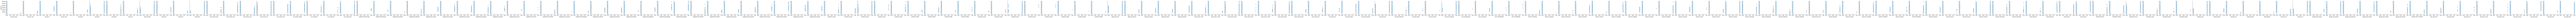

In [85]:
sns.pairplot(all_numerics,y_vars='SalePrice',x_vars=list(all_numerics.columns[59:]))

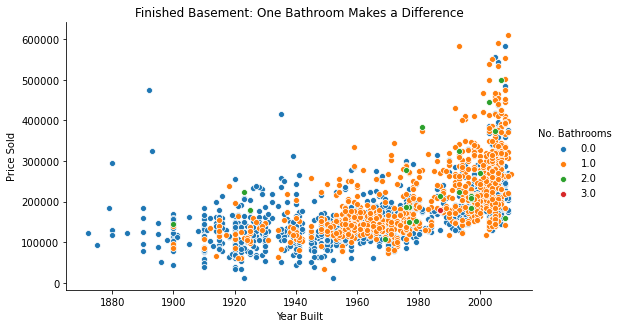

In [160]:
# This method was altrnated for producing different chart for presentation

sns.pairplot(all_numerics,y_vars='SalePrice',x_vars='Year Built',
           hue='Bsmt Full Bath',
             height=4.2,aspect=1.7,)._legend.set_title('No. Bathrooms')

# stack overflow was consulted for changing legend

plt.title('Finished Basement: One Bathroom Makes a Difference')
plt.ylabel('Price Sold')
plt.xlabel('Year Built');

# 'Qualty:\n 1 = \'Best\'


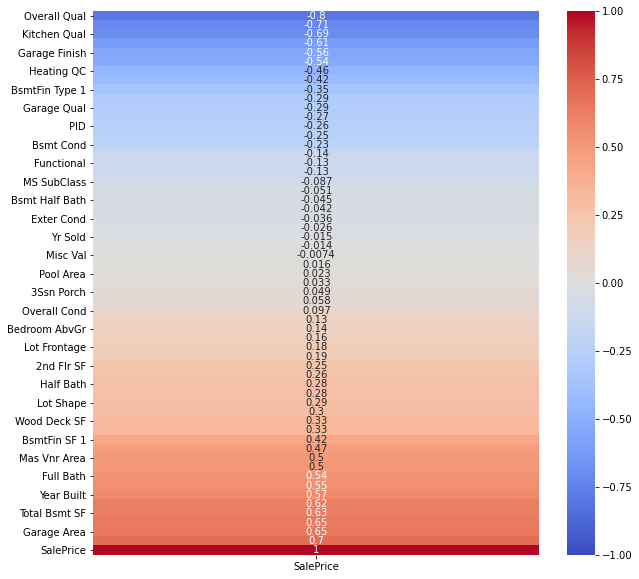

In [92]:
# Stack Overflow was consulted for subplot figure sizing
# Identifying correlation with Target from Continuous, Discrete, and Ordinals

plt.subplots(figsize=(10,10))
sns.heatmap(train_numerics.corr()[['SalePrice']].sort_values('SalePrice'),
            annot=True,vmin=-1,vmax=1,cmap='coolwarm');

In [88]:
# Test for column index of Nominal Dummy Variables on fully concatenated Dataframe,
# also conveniently including target at beginning. Add 1 to slice to exclude target feature.

print(list(all_numerics.columns[58:]))

['SalePrice', 'zoning_A (agr)', 'zoning_C (all)', 'zoning_FV', 'zoning_I (all)', 'zoning_RH', 'zoning_RL', 'zoning_RM', 'alley_Grvl', 'alley_No Alley', 'alley_Pave', 'street_Grvl', 'street_Pave', 'land_contour_Bnk', 'land_contour_HLS', 'land_contour_Low', 'land_contour_Lvl', 'lot_config_Corner', 'lot_config_CulDSac', 'lot_config_FR2', 'lot_config_FR3', 'lot_config_Inside', 'neighborhood_Blmngtn', 'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighbor

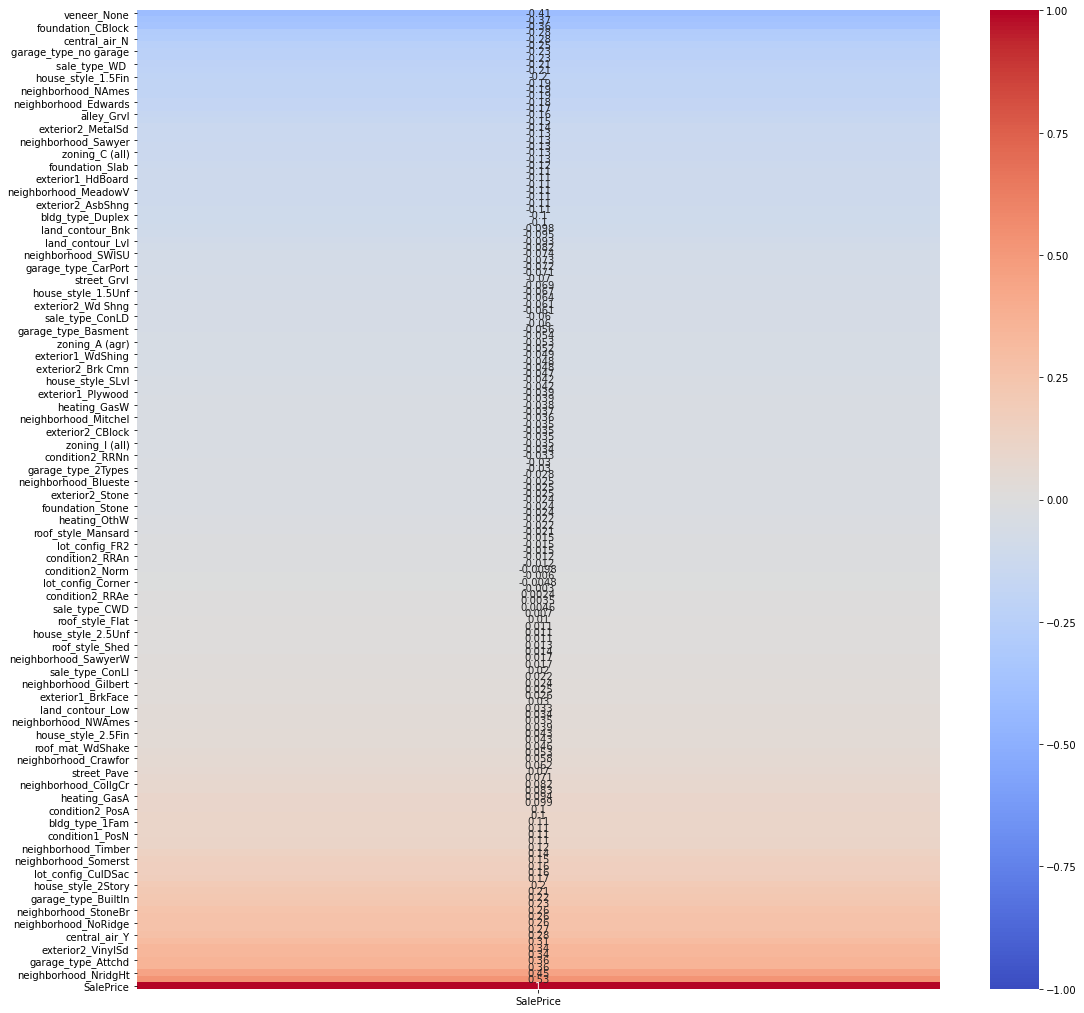

In [89]:
# Identifyng correlations with Target to Nominal encoded features. 
# Annotations are small but discernable for the moment.

plt.subplots(figsize=(18,18))
sns.heatmap(all_numerics[all_numerics.columns[58:]].corr()[['SalePrice']].sort_values('SalePrice'),
            annot=True,vmin=-1,vmax=1,cmap='coolwarm');

In [93]:
continuous_list = ['Lot Frontage',
                                                      'Lot Area',
                                                      'Mas Vnr Area',
                                                       'BsmtFin SF 1',
                                                      'BsmtFin SF 2',
                                                      'Bsmt Unf SF',
                                                      'Total Bsmt SF',
                                                      '1st Flr SF',
                                                      '2nd Flr SF',
                                                       'Low Qual Fin SF',
                                                      'Gr Liv Area',
                                                      'Garage Area',
                                                      'Wood Deck SF',
                                                      'Open Porch SF',
                                                      'Enclosed Porch',
                                                      '3Ssn Porch',
                                                      'Screen Porch',
                                                      'Pool Area']

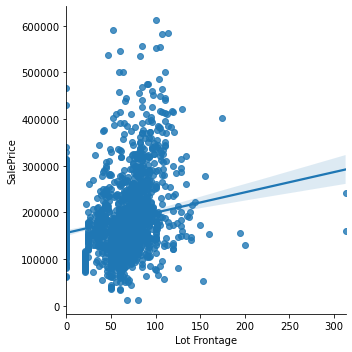

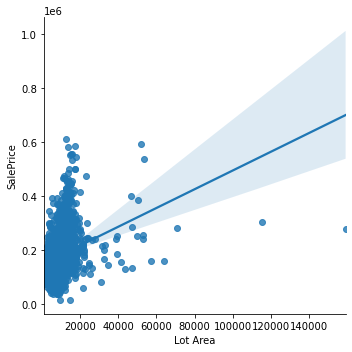

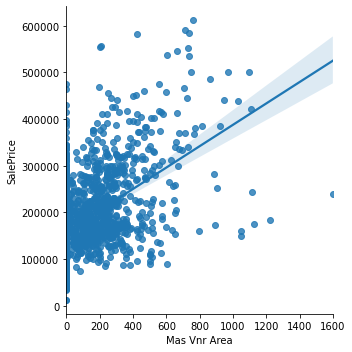

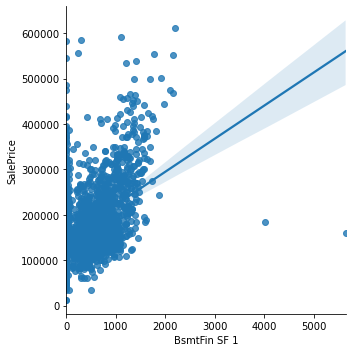

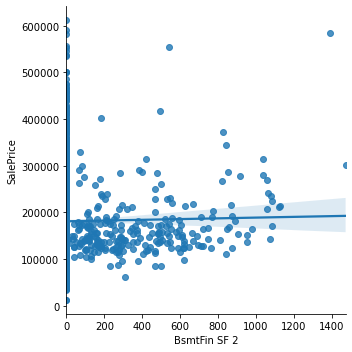

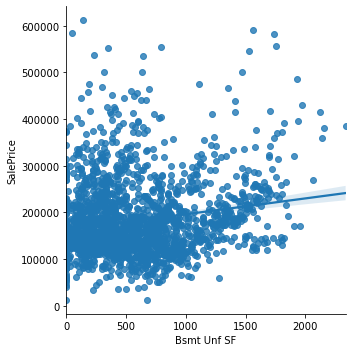

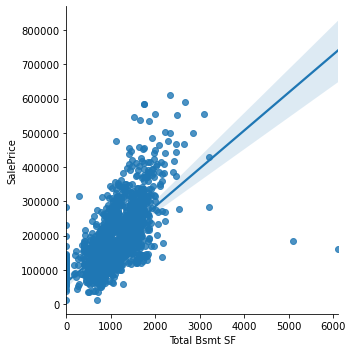

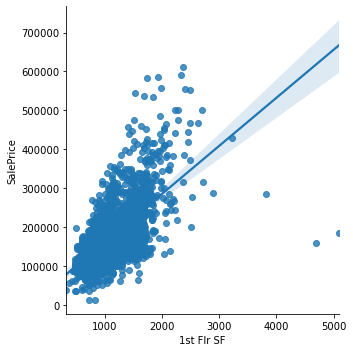

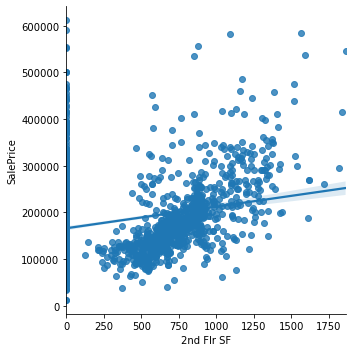

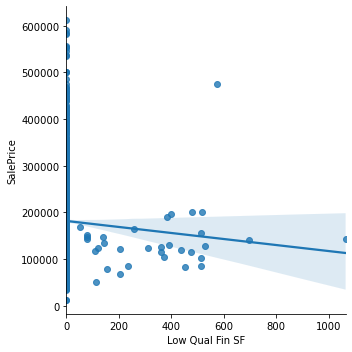

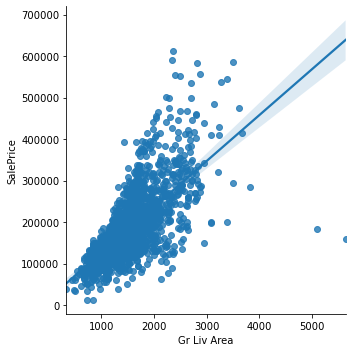

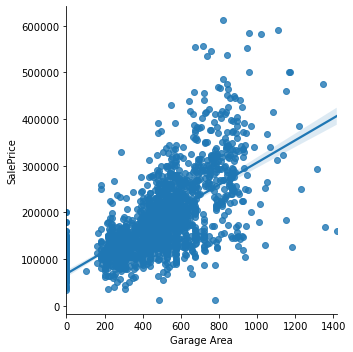

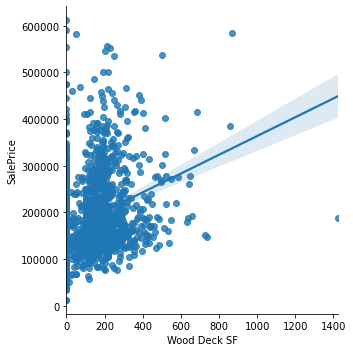

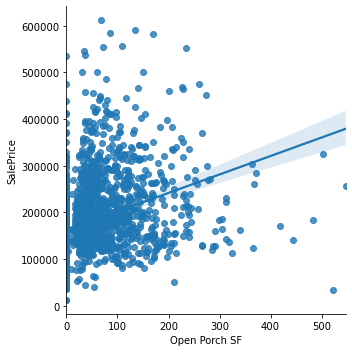

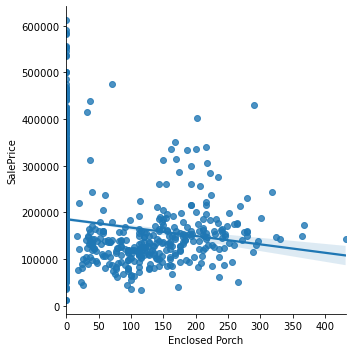

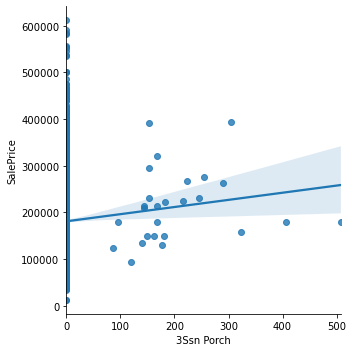

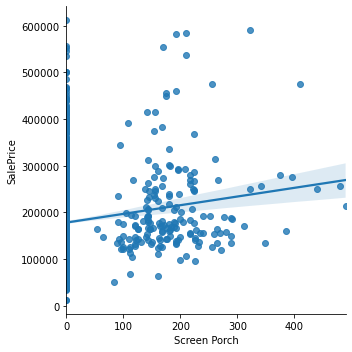

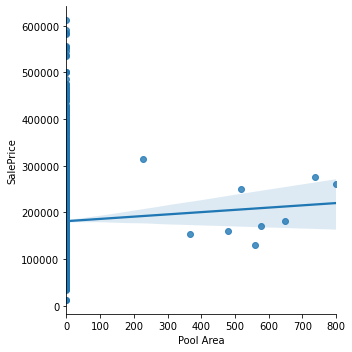

In [94]:
# Testing lmplot with iterations for different data types.

for col in continuous_list:

    sns.lmplot(x=col,y='SalePrice',data=train_numerics)

In [95]:
discrete_list = ['Year Built',
                                                      'Year Remod/Add',
                                                      'Bsmt Full Bath',
                                                       'Bsmt Half Bath',
                                                      'Full Bath',
                                                      'Half Bath',
                                                      'Bedroom AbvGr',
                                                      'Kitchen AbvGr',
                                                      'TotRms AbvGrd',
                                                       'Fireplaces',
                                                      'Garage Yr Blt',
                                                      'Garage Cars',
                                                      'Mo Sold',
                                                      'Yr Sold']

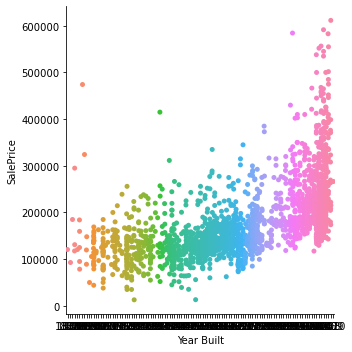

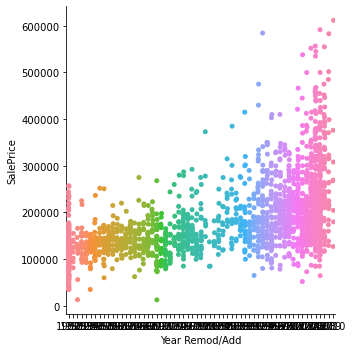

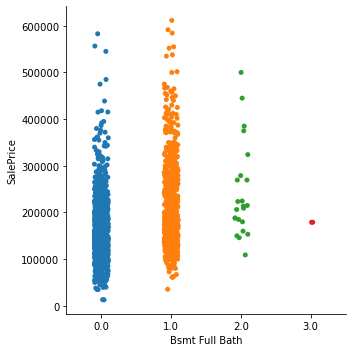

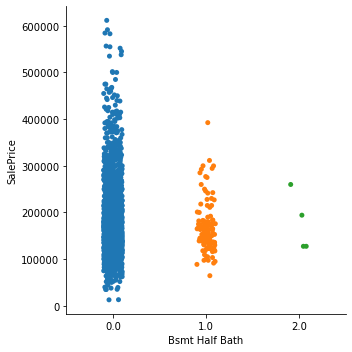

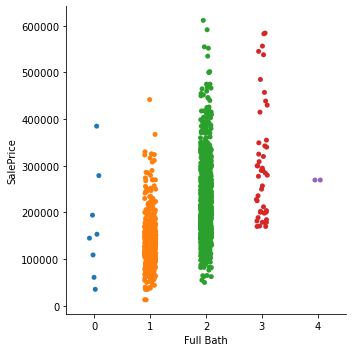

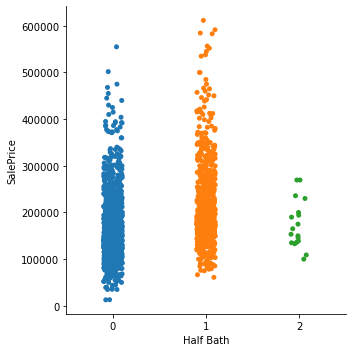

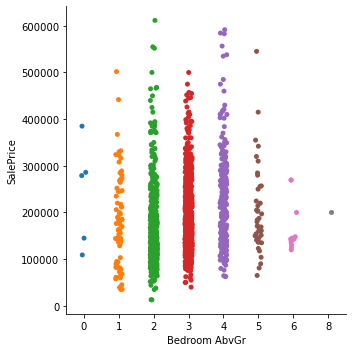

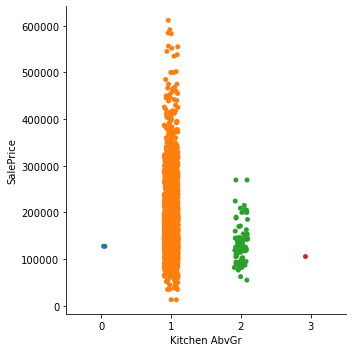

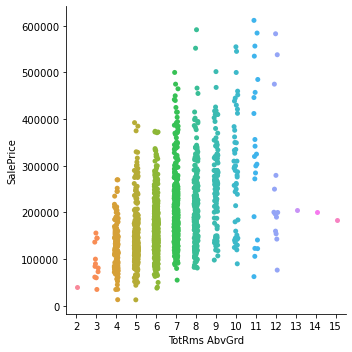

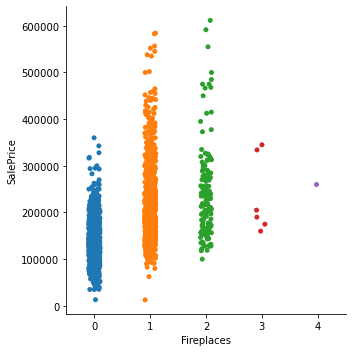

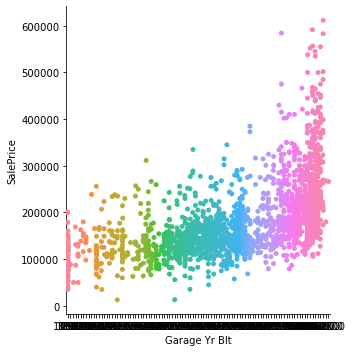

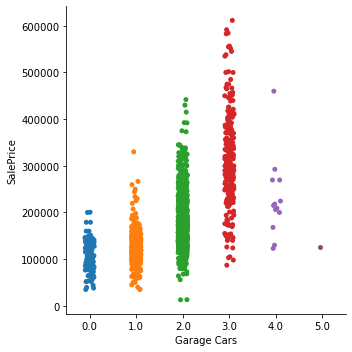

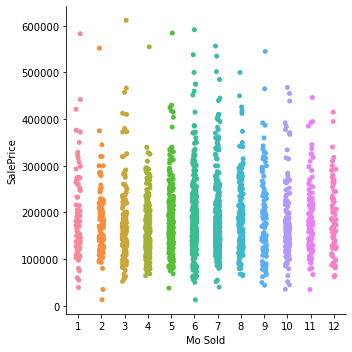

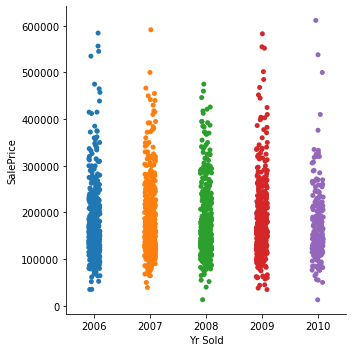

In [96]:
for col in discrete_list:

    sns.catplot(x=col,y='SalePrice',data=train_numerics)

<AxesSubplot:xlabel='Fireplaces'>

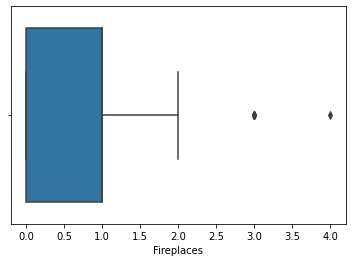

In [97]:
# Bxoplot investigations for reviewing outliers.
sns.boxplot(x=all_numerics['Fireplaces'])

<AxesSubplot:xlabel='Overall Qual'>

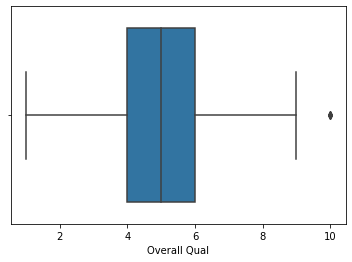

In [98]:
sns.boxplot(x=all_numerics['Overall Qual'])

<AxesSubplot:xlabel='Bedroom AbvGr'>

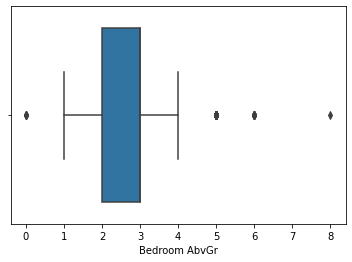

In [99]:
sns.boxplot(x=all_numerics['Bedroom AbvGr'])

<AxesSubplot:xlabel='Kitchen Qual'>

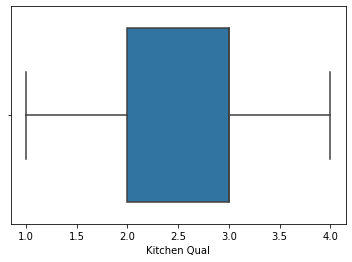

In [100]:
sns.boxplot(x=all_numerics['Kitchen Qual'])

<AxesSubplot:xlabel='Bsmt Exposure'>

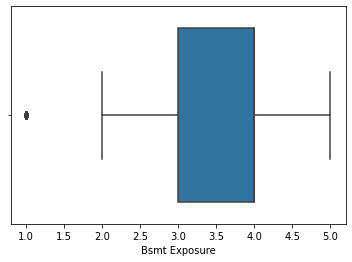

In [101]:
sns.boxplot(x=all_numerics['Bsmt Exposure'])

<AxesSubplot:xlabel='Gr Liv Area'>

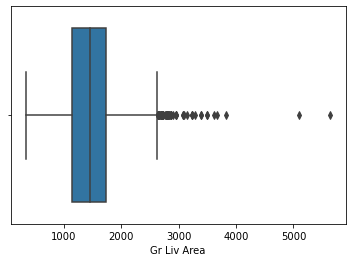

In [102]:
sns.boxplot(x=all_numerics['Gr Liv Area'])

<AxesSubplot:xlabel='Mo Sold'>

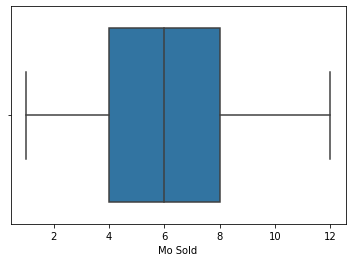

In [103]:
sns.boxplot(x=all_numerics['Mo Sold'])

<AxesSubplot:xlabel='MS SubClass'>

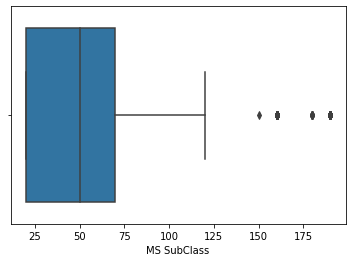

In [105]:
sns.boxplot(x=all_numerics['MS SubClass'])

<AxesSubplot:xlabel='TotRms AbvGrd'>

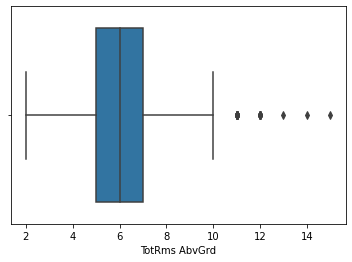

In [106]:
sns.boxplot(x=all_numerics['TotRms AbvGrd'])

<AxesSubplot:xlabel='Yr Sold'>

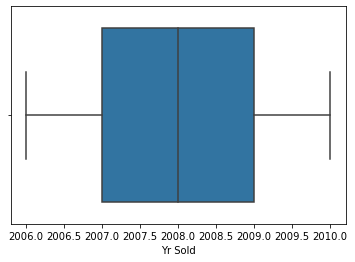

In [107]:
sns.boxplot(x=all_numerics['Yr Sold'])

<AxesSubplot:xlabel='Exter Qual'>

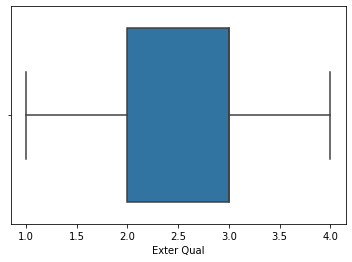

In [109]:
sns.boxplot(x=all_numerics['Exter Qual'])

## Model Fitting, Scaling, TTS, CVS & Initial Testing

In [111]:
# unsuccessful attempt at automated feature selection:

# def separate_transform(data):
    
#     # Set new variable with this function
#     # Organize feature names between encoded and not (underscore is convention):
    
#     id_col = []
#     sales_col = []
#     numeric_cols = []
#     dummy_cols = []
    
#     for col in data.columns:
#         if col == 'Id':
#             id_col.append(col)
#         elif col == 'SalePrice':
#             sales_col.append(col)
#         elif '_' in col:
#             dummy_cols.append(col)
#         else:
#             numeric_cols.append(col)
    
#     if len(id_col) == 0 and len(sales_col) == 0:
#         return pd.concat(data[z_data],data[dummy_cols])

#     id_data = data[id_col]
#     sale_data = data[sales_col]
#     dummy_data = data[dummy_cols]
#     scaled_data = pd.concat([id_data,z_data,sale_data,dummy_data],axis=1)
#     # Drop unshared features from list given above
#     # scaled_data.drop(columns=unshared_feature_list,inplace=True)
    
#     return scaled_data

In [112]:
all_numerics.shape

(2051, 213)

In [113]:
# These Dummy Features are not shared between the two files.

unshared_feature_list = ['zoning_A (agr)',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'condition2_Artery',
 'condition2_PosN',
 'condition2_RRAe',
 'condition2_RRAn',
 'condition2_RRNn',
 'roof_mat_ClyTile',
 'roof_mat_Membran',
 'exterior1_CBlock',
 'exterior1_ImStucc',
 'exterior1_Stone',
 'exterior2_Stone',
 'heating_OthW',
 'heating_Wall']

### Feature Selection:

In [115]:
# create Features Matricies and Target Vector
# 'Obvious' and 'experimental' features are selected from heatmap comparisons
# These different baskets of features and following transformations are the source of alternate submissions.

features_all = [col for col in all_numerics.columns if col != 'SalePrice']

features_obvious = ['Mas Vnr Area','Full Bath','Wood Deck SF',
                   'Total Bsmt SF','Garage Area','Lot Shape','Kitchen Qual',
                   'Garage Finish','Heating QC','BsmtFin Type 1']

features_continuous = continuous_list

features_nominal = [col for col in dummies_frames.columns]

features_discrete = discrete_list

features_numeric = [col for col in train_numerics if col != 'SalePrice']

y = ames_train['SalePrice']

# Toggle X features for different models using above features variables.
# All features used for first model
X = all_numerics[features_continuous+features_discrete]

In [116]:
X.head()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,Yr Sold
0,0.0,13517,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,475.0,0,44,0,0,0,0,1976,2005,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,3,2010
1,43.0,11492,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,559.0,0,74,0,0,0,0,1996,1997,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,4,2009
2,68.0,7922,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,246.0,0,52,0,0,0,0,1953,2007,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,1,2010
3,73.0,9802,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,400.0,100,0,0,0,0,0,2006,2007,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,4,2010
4,82.0,14235,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,484.0,0,59,0,0,0,0,1900,1993,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,3,2010


In [117]:
X.shape

(2051, 32)

In [118]:
# Toggle with above feature shape variables for different models
# TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [120]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)


In [121]:
# initializer model from TTS 
ames_model = LinearRegression()

In [122]:
# fit model
ames_model.fit(Xs_train,y_train)

# ames_model.fit(X_train,y_train)

LinearRegression()

In [123]:
# Display scores
# It was clarified recently that CVS uses the orginal X,y marticies

print('Train r2: ',ames_model.score(Xs_train,y_train))
print('Test r2: ',ames_model.score(Xs_test,y_test))
print('CVS train: ',cross_val_score(ames_model,X,y).mean())
print('CVS test: ',cross_val_score(ames_model,X,y).mean())

# Toggle option for scaled and unscaled data.

# print('Train r2: ',ames_model.score(X_train,y_train))
# print('Test r2: ',ames_model.score(X_test,y_test))
# print('CVS train: ',cross_val_score(ames_model,X_train,y_train).mean())
# print('CVS test: ',cross_val_score(ames_model,X_test,y_test).mean())

Train r2:  0.7805359898495884
Test r2:  0.8241241304173909
CVS train:  0.7700532682932477
CVS test:  0.7700532682932477


### Linear Metrics:

In [124]:
# Predictions
preds = ames_model.predict(Xs_test)

# preds = ames_model.predict(X_test)

In [125]:
metrics.r2_score(y_test, preds)

0.8241241304173909

In [126]:
# MSE from TTS data
metrics.mean_squared_error(y_test, preds)

1079882188.7021577

In [127]:
# RMSE 1st attempt
np.sqrt((metrics.mean_squared_error(y_test, preds)))

32861.5609596099

In [128]:
# Null Prediction
y.mean()

181469.70160897123

In [129]:
ames_model.coef_

array([ 2.63166304e+03,  1.23848200e+03,  7.74227934e+03, -1.37658226e+17,
       -4.98796253e+16, -1.30166010e+17,  1.33608492e+17, -4.70040580e+16,
       -4.94999649e+16, -6.14086991e+15,  5.89811580e+16,  6.27065899e+03,
        2.42999490e+03, -4.47631925e+02,  1.38173169e+03,  7.98448961e+02,
        6.20902653e+03, -6.77162874e+03,  1.16524679e+04,  1.17556023e+04,
        6.12886740e+03, -5.94556590e+02,  2.42739155e+03, -1.43341741e+03,
       -7.36815148e+03, -7.95370759e+03,  1.03417412e+04,  6.85994865e+03,
       -4.85464666e+03,  9.43094577e+03,  8.85901479e+02, -8.01896312e+02])

In [130]:
ames_model.intercept_

181039.59449990414

In [133]:
# numerical putput coefficients
pd.DataFrame(set(zip(X.columns, ames_model.coef_))).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,3Ssn Porch,Open Porch SF,BsmtFin SF 1,Gr Liv Area,Full Bath,Half Bath,Mas Vnr Area,Bsmt Half Bath,Yr Sold,Screen Porch,Bsmt Full Bath,Pool Area,Total Bsmt SF,Garage Yr Blt,BsmtFin SF 2,Kitchen AbvGr,Fireplaces,Garage Cars,Low Qual Fin SF,Bedroom AbvGr,Year Remod/Add,Bsmt Unf SF,Garage Area,Year Built,Lot Area,TotRms AbvGrd,Wood Deck SF,Lot Frontage,2nd Flr SF,Enclosed Porch,Mo Sold,1st Flr SF
1,798.449,-447.632,-1.37658e+17,5.89812e+16,2427.39,-1433.42,7742.28,-594.557,-801.896,6209.03,6128.87,-6771.63,1.33608e+17,-4854.65,-4.98796e+16,-7953.71,6859.95,9430.95,-6.14087e+15,-7368.15,11755.6,-1.30166e+17,6270.66,11652.5,1238.48,10341.7,2429.99,2631.66,-4.95e+16,1381.73,885.901,-4.70041e+16


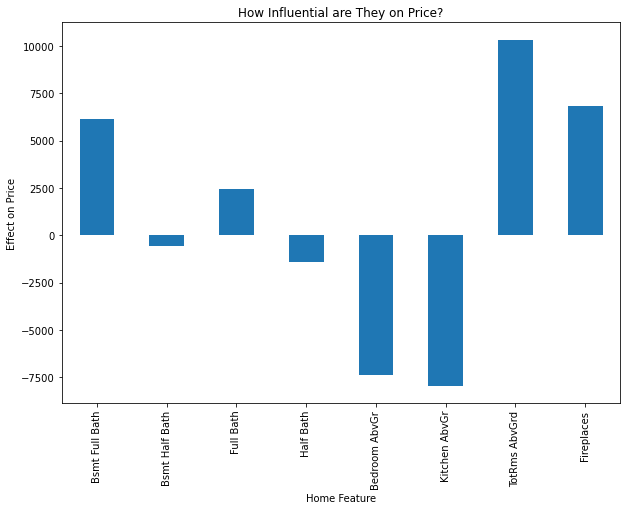

In [135]:
# Credit to Riley for including this method in class notebook.
# Particular slice was used for sample of calculated coefficients.

pd.Series(ames_model.coef_[20:28], index=X.columns[20:28]).plot.bar(figsize=(10, 7))

plt.title('How Influential are They on Price?')
plt.ylabel('Effect on Price')
plt.xlabel('Home Feature');

## LINE Assumption Tests:

In [136]:
resids = y_test - preds

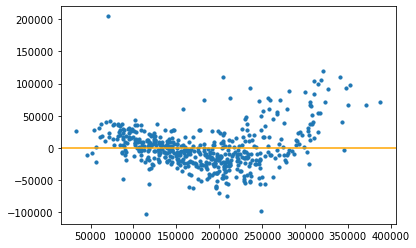

In [137]:
# It appears some heteroskedasticity might be present

plt.scatter(preds,resids,s=10)
plt.axhline(0,color='orange');

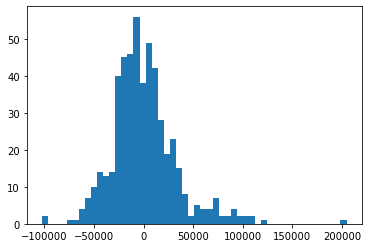

In [138]:
# approximately normal distribution

plt.hist(resids,bins=50);

In [139]:
Xs_train.shape

(1538, 32)

### Ridge Model:

In [140]:
# Credit to caroline for introducing the following format

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [141]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(Xs_train,y_train)
ridge_model.score(Xs_train,y_train), ridge_model.score(Xs_test,y_test)

(0.7805009180875666, 0.824171385602924)

In [142]:
r_alphas = np.logspace(1,100,1000000)

ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_cv = ridge_model.fit(Xs_train, y_train)
ridge_cv.score(Xs_train,y_train), ridge_cv.score(Xs_test,y_test)

(0.7805009180875666, 0.824171385602924)

In [143]:
ridge_cv.alpha

10

In [144]:
# Ridge output coefficients
pd.DataFrame(set(zip(X.columns, ridge_model.coef_))).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,Gr Liv Area,Enclosed Porch,Garage Area,Wood Deck SF,Full Bath,TotRms AbvGrd,BsmtFin SF 1,Lot Area,Year Remod/Add,BsmtFin SF 2,Low Qual Fin SF,Mas Vnr Area,Bsmt Unf SF,Lot Frontage,Open Porch SF,Year Built,Mo Sold,Yr Sold,Garage Cars,Total Bsmt SF,Bedroom AbvGr,Bsmt Half Bath,Kitchen AbvGr,Fireplaces,3Ssn Porch,Half Bath,2nd Flr SF,Garage Yr Blt,Bsmt Full Bath,Pool Area,1st Flr SF,Screen Porch
1,13215.8,1365.9,6412.74,2461.4,2555.12,10240.1,4200.38,1311.12,11778.4,623.38,-1133.82,7744.03,2299.91,2609.44,-397.308,11543.6,896.035,-775.082,9262.15,6801.07,-7174.18,-587.987,-7890.34,6865.14,764.582,-1341.38,8372.84,-4718.49,6145.06,-6697.25,7914.05,6175.93


### Lasso:

In [145]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(Xs_train,y_train)
lasso_model.score(Xs_train,y_train), lasso_model.score(Xs_test,y_test)

/Users/ash/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2237479948.32251, tolerance: 972711210.8729936
  positive)


(0.7805111600767698, 0.8241635630491302)

In [146]:
alphas = np.linspace(.05,1,100)

lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(X_train,y_train)
lasso_cv.score(X_train,y_train), lasso_cv.score(X_test,y_test)

(0.7805111654184935, 0.8241603650094573)

In [147]:
lasso_cv.alpha_

0.05

In [148]:
# Lasso output coefficients
pd.DataFrame(set(zip(X.columns, lasso_cv.coef_))).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,Open Porch SF,TotRms AbvGrd,Enclosed Porch,Mas Vnr Area,2nd Flr SF,Bsmt Full Bath,Kitchen AbvGr,Full Bath,Garage Area,Bedroom AbvGr,Bsmt Half Bath,Garage Cars,Lot Frontage,Bsmt Unf SF,Garage Yr Blt,1st Flr SF,Low Qual Fin SF,Half Bath,Year Remod/Add,Wood Deck SF,Lot Area,Year Built,BsmtFin SF 1,3Ssn Porch,Total Bsmt SF,Gr Liv Area,Screen Porch,Pool Area,Yr Sold,Mo Sold,BsmtFin SF 2,Fireplaces
1,-6.71617,6628.49,23.297,43.9748,39.4719,11721.8,-39417.8,4280.11,28.9425,-8925.3,-2314.75,12301.4,77.2113,12.7504,-10.5061,39.154,-2.46727,-3030.39,563.652,19.486,0.239091,388.571,16.4378,29.4009,7.29827,6.91701,109.121,-173.528,-593.06,332.115,11.2463,10754.3


### Landing New Test Data CSV for Submission:

In [149]:
# Toggle filepaths for separate differently processed files.
test = pd.read_csv('./datasets/prepro_testdata10.csv')
test.head()

,Unnamed: 0,Id,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,Yr Sold
0,0,2658,69.0,9142,0.0,0,0,1020,1020,908,1020,0,1928,440,0,60,112,0,0,0,1910,1950,0,0,2,0,4,2,9,0,1910.0,1,4,2006
1,1,2718,0.0,9662,0.0,0,0,1967,1967,1967,0,0,1967,580,170,0,0,0,0,0,1977,1977,0,0,2,0,6,2,10,0,1977.0,2,8,2006
2,2,2414,58.0,17104,0.0,554,0,100,654,664,832,0,1496,426,100,24,0,0,0,0,2006,2006,1,0,2,1,3,1,7,1,2006.0,2,9,2006
3,3,1989,60.0,8520,0.0,0,0,968,968,968,0,0,968,480,0,0,184,0,0,0,1923,2006,0,0,1,0,2,1,5,0,1935.0,2,7,2007
4,4,625,0.0,9500,247.0,609,0,785,1394,1394,0,0,1394,514,0,76,0,0,185,0,1963,1963,1,0,1,1,3,1,6,2,1963.0,2,7,2009


In [150]:
#Drop newly introduced unnamed column
test.drop(columns='Unnamed: 0',inplace=True)

In [151]:
# Verifying that DataFrame features match match

len(X_train.columns)

32

In [152]:
len(X.columns)

32

In [153]:
# This is the ID column
len(test.columns)

33

#### Scale Imported test data: recombine with test dummies

In [154]:
test_sc = ss.transform(test.drop(columns='Id'))

In [155]:
test_sc.shape

(878, 32)

### Searching for features not shared by Train and Test Data:

In [156]:
# Failed attempt at verifying if hapes of two DataFrames match.

# def shape_match(train,test):

#     for col in train.columns:
#         if col not in test.columns:
#             print('only train: ',col,end=' ')
            
#     for col in test.columns:
#         if col not in train.columns:
#             print('only test: ',col,end=' ')

### Final Landing for Submission:

In [157]:
# Toggle with lasso and ridge models
# Credit to Heather for new column method
test['SalePrice'] = lasso_cv.predict(test_sc)

In [158]:
# Credit to Heather and Caroline for this procedure.
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':test['SalePrice']})

submission.head()

,Id,SalePrice
0,2658,-845938.832094
1,2718,-845360.644099
2,2414,-595937.083915
3,1989,-636140.482947
4,625,-594042.763884


In [159]:
submission.shape

(878, 2)

In [3292]:
# Toggle number in file path for alternate submissions.
submission.to_csv('./datasets/lasso_submission2.csv',index=False)